# Objective
Explore embedding exercises following the training, using free Gemini embedding model: gemini-embedding-1.0
* free 1k requests per day
* free 100 requests per min (30k tokens per min)

## References
* Original traning using VertexAI (which we do not have access to) https://learn.deeplearning.ai/courses/google-cloud-vertex-ai/lesson/nswu9/getting-started-with-text-embeddings
* Documentation https://ai.google.dev/gemini-api/docs/embeddings

visualise embeddings exercise - utils.py
```
import os
from dotenv import load_dotenv
import json
import base64
from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

def authenticate():
    return "DALI-credentials", "DLAI-PROJECT"
    #Load .env
    load_dotenv()
    
    #Decode key and store in .JSON
    SERVICE_ACCOUNT_KEY_STRING_B64 = os.getenv('SERVICE_ACCOUNT_KEY')
    SERVICE_ACCOUNT_KEY_BYTES_B64 = SERVICE_ACCOUNT_KEY_STRING_B64.encode("ascii")
    SERVICE_ACCOUNT_KEY_STRING_BYTES = base64.b64decode(SERVICE_ACCOUNT_KEY_BYTES_B64)
    SERVICE_ACCOUNT_KEY_STRING = SERVICE_ACCOUNT_KEY_STRING_BYTES.decode("ascii")

    SERVICE_ACCOUNT_KEY = json.loads(SERVICE_ACCOUNT_KEY_STRING)


    # Create credentials based on key from service account
    # Make sure your account has the roles listed in the Google Cloud Setup section
    credentials = Credentials.from_service_account_info(
        SERVICE_ACCOUNT_KEY,
        scopes=['https://www.googleapis.com/auth/cloud-platform'])

    if credentials.expired:
        credentials.refresh(Request())
    
    #Set project ID accoridng to environment variable    
    PROJECT_ID = os.getenv('PROJECT_ID')
        
    return credentials, PROJECT_ID

def plot_heatmap(data, x_labels=None, y_labels=None, title=None):
    fig, ax = plt.subplots(figsize=(50, 3))
    heatmap = ax.pcolor(data, cmap='coolwarm', edgecolors='k', linewidths=0.1)

    # Add color bar to the right of the heatmap
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.remove()

    # Set labels for each axis
    if x_labels:
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
    if y_labels:
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
        ax.set_yticklabels(y_labels, va="center")

    # Set title
    if title:
        ax.set_title(title)
        
    plt.tight_layout()

    # Show the plot
    plt.show()
    
def plot_2D(x_values, y_values, labels):

    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()

```

In [18]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [19]:
pip install mplcursors

In [20]:
!pip install ipympl

In [21]:
from google import genai
from google.genai import types

In [22]:
client = genai.Client(api_key = GEMINI_API_KEY)
client

In [9]:
model_name = "gemini-embedding-001"

# Embedding for 1 sentence

In [10]:
result = client.models.embed_content(
        model=model_name,
        contents="What is the meaning of life?")

print(result.embeddings)

[ContentEmbedding(
  values=[
    -0.022374554,
    -0.004560777,
    0.013309286,
    -0.0545072,
    -0.02090443,
    <... 3067 more items ...>,
  ]
)]


In [11]:
result

EmbedContentResponse(
  embeddings=[
    ContentEmbedding(
      values=[
        -0.022374554,
        -0.004560777,
        0.013309286,
        -0.0545072,
        -0.02090443,
        <... 3067 more items ...>,
      ]
    ),
  ],
  sdk_http_response=HttpResponse(
    headers=<dict len=10>
  )
)

In [12]:
result.__dict__

{'sdk_http_response': HttpResponse(
   headers=<dict len=10>
 ),
 'embeddings': [ContentEmbedding(
    values=[
      -0.022374554,
      -0.004560777,
      0.013309286,
      -0.0545072,
      -0.02090443,
      <... 3067 more items ...>,
    ]
  )],
 'metadata': None}

In [14]:
len(result.embeddings)

1

In [13]:
result.embeddings[0]

ContentEmbedding(
  values=[
    -0.022374554,
    -0.004560777,
    0.013309286,
    -0.0545072,
    -0.02090443,
    <... 3067 more items ...>,
  ]
)

In [18]:
type(result.embeddings[0])

google.genai.types.ContentEmbedding

In [16]:
result.embeddings[0].__dict__

{'values': [-0.022374554,
  -0.004560777,
  0.013309286,
  -0.0545072,
  -0.02090443,
  0.012355714,
  0.015772128,
  0.0054723006,
  0.031729158,
  0.0058553913,
  0.027073925,
  -0.0045324513,
  -0.01544016,
  0.031618375,
  0.121548004,
  0.01925409,
  0.0008599909,
  0.0061733276,
  -0.009662611,
  -0.015545654,
  0.017062597,
  -0.008637558,
  -0.017125048,
  0.0077396077,
  -0.0153139075,
  0.011430326,
  0.020329107,
  -0.00451,
  0.024133444,
  0.0070407446,
  0.020197608,
  0.0015623937,
  -0.008911156,
  0.028138846,
  -0.017435355,
  -0.012656962,
  0.009481721,
  -0.016410641,
  -0.015019126,
  0.0144167375,
  -0.023614116,
  -0.010397569,
  -0.0024164703,
  -0.019404082,
  0.019276941,
  -0.011112846,
  0.014422737,
  -0.042639293,
  -0.014391114,
  0.008184219,
  -0.012202394,
  0.012318022,
  -0.010061107,
  -0.15826157,
  0.015428178,
  0.01053043,
  -0.0069031497,
  -0.010121202,
  -0.025695775,
  -0.028000489,
  -0.0070861652,
  -0.014084083,
  -0.008487853,
  -0.0221

In [20]:
type(result.embeddings[0].values)

list

In [19]:
result.embeddings[0].values

[-0.022374554,
 -0.004560777,
 0.013309286,
 -0.0545072,
 -0.02090443,
 0.012355714,
 0.015772128,
 0.0054723006,
 0.031729158,
 0.0058553913,
 0.027073925,
 -0.0045324513,
 -0.01544016,
 0.031618375,
 0.121548004,
 0.01925409,
 0.0008599909,
 0.0061733276,
 -0.009662611,
 -0.015545654,
 0.017062597,
 -0.008637558,
 -0.017125048,
 0.0077396077,
 -0.0153139075,
 0.011430326,
 0.020329107,
 -0.00451,
 0.024133444,
 0.0070407446,
 0.020197608,
 0.0015623937,
 -0.008911156,
 0.028138846,
 -0.017435355,
 -0.012656962,
 0.009481721,
 -0.016410641,
 -0.015019126,
 0.0144167375,
 -0.023614116,
 -0.010397569,
 -0.0024164703,
 -0.019404082,
 0.019276941,
 -0.011112846,
 0.014422737,
 -0.042639293,
 -0.014391114,
 0.008184219,
 -0.012202394,
 0.012318022,
 -0.010061107,
 -0.15826157,
 0.015428178,
 0.01053043,
 -0.0069031497,
 -0.010121202,
 -0.025695775,
 -0.028000489,
 -0.0070861652,
 -0.014084083,
 -0.008487853,
 -0.022122845,
 0.0084621115,
 -0.008990799,
 -0.020783192,
 0.010838266,
 0.00139

In [24]:
# embedding has 3072 dims
print(f"Length = {len(result.embeddings[0].values)}") # 3072

Length = 3072


In [22]:
# 1st 10 dims
result.embeddings[0].values[:10]

[-0.022374554,
 -0.004560777,
 0.013309286,
 -0.0545072,
 -0.02090443,
 0.012355714,
 0.015772128,
 0.0054723006,
 0.031729158,
 0.0058553913]

# Similarity

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
texts = [
    "What is the meaning of life?",
    "What is the purpose of existence?",
    "How do I bake a cake?"]

In [28]:
result0 = client.models.embed_content(
        model=model_name,
        contents=texts[0])

print(result0.embeddings)

[ContentEmbedding(
  values=[
    -0.022374554,
    -0.004560777,
    0.013309286,
    -0.0545072,
    -0.02090443,
    <... 3067 more items ...>,
  ]
)]


In [29]:
result1 = client.models.embed_content(
        model=model_name,
        contents=texts[1])

print(result1.embeddings)

[ContentEmbedding(
  values=[
    -0.0139728645,
    0.0060413396,
    0.018371258,
    -0.034646027,
    0.0063135703,
    <... 3067 more items ...>,
  ]
)]


In [32]:
cosine_similarity(result0.embeddings[0].values, result1.embeddings[0].values)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.02237455 -0.00456078  0.01330929 ...  0.00452012  0.0186499
  0.01224912].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
# Reason: The cosine_similarity function from sklearn expects 2D arrays as input, where each row is a sample.
# The result.embeddings[0].values is a 1D list. We need to reshape it to a 2D array with one row.
import numpy as np

embedding0 = np.array(result0.embeddings[0].values).reshape(1, -1)
embedding1 = np.array(result1.embeddings[0].values).reshape(1, -1)

similarity_score = cosine_similarity(embedding0, embedding1)

print(f"Cosine similarity between '{texts[0]}' and '{texts[1]}': {similarity_score[0][0]}")

Cosine similarity between 'What is the meaning of life?' and 'What is the purpose of existence?': 0.7412509804187927


In [36]:
result0 = client.models.embed_content(
        model=model_name,
        contents=texts[0],
        # truncate embedding dims to a smaller size without losing quality to save storage space.
        # We recommend using 768, 1536, or 3072 output dimensions
        config=types.EmbedContentConfig(output_dimensionality=768)
        )

print(result0.embeddings)

result1 = client.models.embed_content(
        model=model_name,
        contents=texts[1],
        config=types.EmbedContentConfig(output_dimensionality=768)
        )

print(result1.embeddings)

result2 = client.models.embed_content(
        model=model_name,
        contents=texts[2],
        config=types.EmbedContentConfig(output_dimensionality=768)
        )

print(result2.embeddings)


[ContentEmbedding(
  values=[
    -0.022374554,
    -0.004560777,
    0.013309286,
    -0.0545072,
    -0.02090443,
    <... 763 more items ...>,
  ]
)]
[ContentEmbedding(
  values=[
    -0.0139728645,
    0.0060413396,
    0.018371258,
    -0.034646027,
    0.0063135703,
    <... 763 more items ...>,
  ]
)]
[ContentEmbedding(
  values=[
    -0.007725285,
    -0.00084257574,
    0.032764047,
    -0.027071664,
    -0.01249039,
    <... 763 more items ...>,
  ]
)]


In [38]:
# embedding truncated from 3072 dims to 768 dims
print(f"Length = {len(result0.embeddings[0].values)}")
print(f"Length = {len(result1.embeddings[0].values)}")
print(f"Length = {len(result2.embeddings[0].values)}")

Length = 768
Length = 768
Length = 768


In [39]:
embedding0 = np.array(result0.embeddings[0].values).reshape(1, -1)
embedding1 = np.array(result1.embeddings[0].values).reshape(1, -1)
embedding2 = np.array(result2.embeddings[0].values).reshape(1, -1)
print(f"Shape = {embedding0.shape}")
print(f"Shape = {embedding1.shape}")
print(f"Shape = {embedding2.shape}")



similarity_score01 = cosine_similarity(embedding0, embedding1)
similarity_score02 = cosine_similarity(embedding0, embedding2)
similarity_score12 = cosine_similarity(embedding1, embedding2)
print(f"Cosine similarity between '{texts[0]}' and '{texts[1]}': {similarity_score01[0][0]}")
print(f"Cosine similarity between '{texts[0]}' and '{texts[2]}': {similarity_score02[0][0]}")
print(f"Cosine similarity between '{texts[1]}' and '{texts[2]}': {similarity_score12[0][0]}")


Shape = (1, 768)
Shape = (1, 768)
Shape = (1, 768)
Cosine similarity between 'What is the meaning of life?' and 'What is the purpose of existence?': 0.734049597323152
Cosine similarity between 'What is the meaning of life?' and 'How do I bake a cake?': 0.48216649517717786
Cosine similarity between 'What is the purpose of existence?' and 'How do I bake a cake?': 0.46984334145659806


In [40]:
similarity_score01

array([[0.7340496]])

# From word to "mean of sentence" embeddings
* method1 - sentence > words > SUM of word embeddings
* method2 - sentence > words > AVG of word embeddings (SHOWN HERE)
* BOTH methods 1 and 2 ignore order/context of words

In [42]:
in_1 = "The kids play in the park."
in_2 = "The play was for kids in the park."

# Remove stop words like ["the", "in", "for", "an", "is"] and punctuation.
in_pp_1 = ["kids", "play", "park"]
in_pp_2 = ["play", "kids", "park"]

In [45]:
# Generate one embedding for each word. So this is a list of three lists.
results_sentence1 = [client.models.embed_content(
                     model=model_name,
                     contents=word,
                     config=types.EmbedContentConfig(output_dimensionality=768)
                     ) for word in in_pp_1]
len(results_sentence1)

3

In [48]:
# previously we expanded with new dim to be 2D for cosine similarity to work
# embedding_sentence1 = [np.array(embedding_obj.embeddings[0].values).reshape(1, -1) for embedding_obj in results_sentence1]

# now
# no need to expand with new dim (for cosine similarity) because we will stack row-wise later
# (1 row for each word, which will naturally add new dim, and become 2D)
embedding_sentence1 = [np.array(embedding_obj.embeddings[0].values).reshape(-1) for embedding_obj in results_sentence1]
len(embedding_sentence1)

3

In [49]:
# Use numpy to convert this list of lists into a 2D array of 3 rows and 768 columns.
emb_array_1 = np.stack(embedding_sentence1)
print(emb_array_1.shape)


(3, 768)


In [50]:
results_sentence2 = [client.models.embed_content(
                     model=model_name,
                     contents=word,
                     config=types.EmbedContentConfig(output_dimensionality=768)
                     ) for word in in_pp_2]
embedding_sentence2 = [np.array(embedding_obj.embeddings[0].values).reshape(-1) for embedding_obj in results_sentence2]
len(embedding_sentence2)

3

In [51]:
emb_array_2 = np.stack(embedding_sentence2)
print(emb_array_2.shape)

(3, 768)


In [54]:
emb_1_mean = emb_array_1.mean(axis = 0)
print(emb_1_mean.shape)
emb_1_mean[:10]

(768,)


array([-0.00363266, -0.00089432,  0.02152347, -0.06364493, -0.00877247,
       -0.00157042, -0.00776682,  0.01108704,  0.00936513, -0.00645332])

In [55]:
emb_2_mean = emb_array_2.mean(axis = 0)
print(emb_2_mean.shape)
emb_2_mean[:10]

(768,)


array([-0.00363266, -0.00089432,  0.02152347, -0.06364493, -0.00877247,
       -0.00157042, -0.00776682,  0.01108704,  0.00936513, -0.00645332])

In [62]:
similarity_score_sentencefulldim12 = cosine_similarity(emb_array_1, emb_array_2)
print(f"Cosine similarity between '{in_pp_1}' and '{in_pp_2} using full dims':\n{similarity_score_sentencefulldim12}")
print(f"Mean cosine similarity using full dims: {similarity_score_sentencefulldim12.mean()}")

# need to reshape 'mean' to have 1 extra dim to become 2D, needed by 'cosine_similarity'
# Correctly reshape the mean vectors to (1, 768)
similarity_score_sentencemean12 = cosine_similarity(emb_1_mean.reshape(1,-1), emb_2_mean.reshape(1,-1))
print(f"Cosine similarity between '{in_pp_1}' and '{in_pp_2} using mean across dims': {similarity_score_sentencemean12[0][0]}")

Cosine similarity between '['kids', 'play', 'park']' and '['play', 'kids', 'park'] using full dims':
[[0.53943057 1.         0.54267216]
 [1.         0.53943057 0.5814832 ]
 [0.5814832  0.54267216 1.        ]]
Mean cosine similarity using full dims: 0.7030190951984172
Cosine similarity between '['kids', 'play', 'park']' and '['play', 'kids', 'park'] using mean across dims': 1.0000000000000004


# Sentence embeddings
* Sentence > Words > Tokens > compute context-aware representation of tokens (otw words)
* context-aware = aware of the order of tokens
* tokens help u unstd infrequent/novel words, misspelt words

* Contrastive learning when training a transformer
  * given 'similar sentence' dataset, tune NN to move similar sentence embeddings closer vs dissimilar embeddings further

In [ ]:
in_1 = "The kids play in the park."
in_2 = "The play was for kids in the park."

In [66]:
# Generate one embedding for each word. So this is a list of three lists.
results_sentence1 = client.models.embed_content(
                    model=model_name,
                    contents=in_1,
                    config=types.EmbedContentConfig(output_dimensionality=768)
                    )
print(f"Length = {len(results_sentence1.embeddings[0].values)}")

Length = 768


In [67]:
results_sentence2 = client.models.embed_content(
                    model=model_name,
                    contents=in_2,
                    config=types.EmbedContentConfig(output_dimensionality=768)
                    )
print(f"Length = {len(results_sentence2.embeddings[0].values)}")

Length = 768


In [68]:
embedding_sentence1 = np.array(results_sentence1.embeddings[0].values).reshape(1, -1)
embedding_sentence2 = np.array(results_sentence2.embeddings[0].values).reshape(1, -1)
print(f"Shape = {embedding_sentence1.shape}")
print(f"Shape = {embedding_sentence2.shape}")

similarity_score_sentence12 = cosine_similarity(embedding_sentence1, embedding_sentence2)
print(f"Cosine similarity between '{in_1}' and '{in_2}': {similarity_score_sentence12[0][0]}")


Shape = (1, 768)
Shape = (1, 768)
Cosine similarity between 'The kids play in the park.' and 'The play was for kids in the park.': 0.8239169522752825


# Visualise Embeddings

### Sentence Embeddings

In [69]:
in_1 = "Missing flamingo discovered at swimming pool"
in_2 = "Sea otter spotted on surfboard by beach"
in_3 = "Baby panda enjoys boat ride"

in_4 = "Breakfast themed food truck beloved by all!"
in_5 = "New curry restaurant aims to please!"

in_6 = "Python developers are wonderful people"
in_7 = "TypeScript, C++ or Java? All are great!"

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [70]:
embeddings = []
for input_text in input_text_lst_news:
    # embedding values list - 1 for each sentence
    emb = client.models.embed_content(
                    model=model_name,
                    contents=input_text,
                    config=types.EmbedContentConfig(output_dimensionality=768)
                    ).embeddings[0].values
    # list of lists
    embeddings.append(emb)

embeddings_array = np.array(embeddings)

In [73]:
type(emb)

list

In [71]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 768)
[[-0.02630879  0.00963795 -0.00360841 ... -0.02936171  0.03421148
  -0.00606084]
 [-0.03045416  0.01819528 -0.03260056 ...  0.00402235 -0.00182993
  -0.00079946]
 [-0.02737225  0.0102821  -0.00937186 ... -0.00623195  0.04036049
  -0.00572232]
 ...
 [-0.02811683 -0.00440552  0.01441406 ...  0.01519838  0.00653658
   0.01797062]
 [-0.03695967 -0.01335855  0.00691553 ...  0.01581171  0.00568314
  -0.00017875]
 [-0.00868785 -0.01155893  0.0170549  ...  0.02155895  0.02524113
   0.01605129]]


### PCA from 768 dims to 2 dims

In [74]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[-0.23306389  0.04997426]
 [-0.24582774  0.08532927]
 [-0.15121777  0.04240771]
 [ 0.08111416 -0.21927965]
 [ 0.07840287 -0.30225872]
 [ 0.22649875  0.19352655]
 [ 0.24409363  0.15030057]]


### 2D Scatter Plot

In [89]:
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

def plot_heatmap(data, x_labels=None, y_labels=None, title=None):
    fig, ax = plt.subplots(figsize=(50, 3))
    heatmap = ax.pcolor(data, cmap='coolwarm', edgecolors='k', linewidths=0.1)

    # Add color bar to the right of the heatmap
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.remove()

    # Set labels for each axis
    if x_labels:
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
    if y_labels:
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
        ax.set_yticklabels(y_labels, va="center")

    # Set title
    if title:
        ax.set_title(title)

    plt.tight_layout()

    # Show the plot
    plt.show()

def plot_2D(x_values, y_values, labels):

    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Add annotations for each point
    for i, label in enumerate(labels):
        ax.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Create a mplcursors object to manage the data point interaction
    # cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    # @cursor.connect("add")
    # def on_add(sel):
    #     sel.annotation.set_text(labels[sel.target.index])
    #     sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
    #     sel.annotation.set_fontsize(12)

    plt.show()

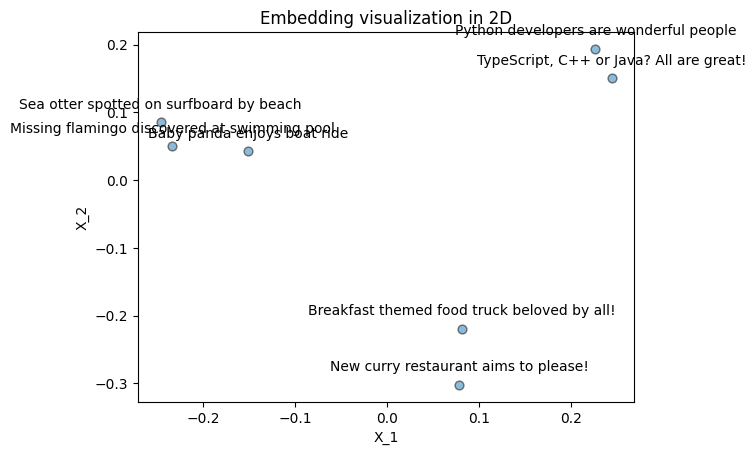

In [91]:
# import matplotlib.pyplot as plt
# import mplcursors
%matplotlib inline

# from utils import plot_2D
plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

### Heatmap - New set of sentences

In [92]:
in_1 = """He couldn’t desert
          his post at the power plant."""

in_2 = """The power plant needed
          him at the time."""

in_3 = """Cacti are able to
          withstand dry environments."""

in_4 = """Desert plants can
          survive droughts."""

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [93]:
embeddings = []
for input_text in input_text_lst_sim:
    # embedding values list - 1 for each sentence
    emb = client.models.embed_content(
                    model=model_name,
                    contents=input_text,
                    config=types.EmbedContentConfig(output_dimensionality=768)
                    ).embeddings[0].values
    # list of lists
    embeddings.append(emb)

embeddings_array = np.array(embeddings)

In [94]:
type(emb)

list

In [95]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (4, 768)
[[-0.0007616  -0.0049386   0.00680063 ...  0.01800804  0.00715599
   0.02822979]
 [-0.0104503  -0.00958817  0.02097829 ...  0.00093181  0.01847434
   0.01824086]
 [-0.00824601  0.0029392  -0.00449412 ... -0.00133634  0.01378004
   0.00433327]
 [ 0.01006667  0.00485555  0.00793578 ...  0.0075878   0.01351022
  -0.01256717]]


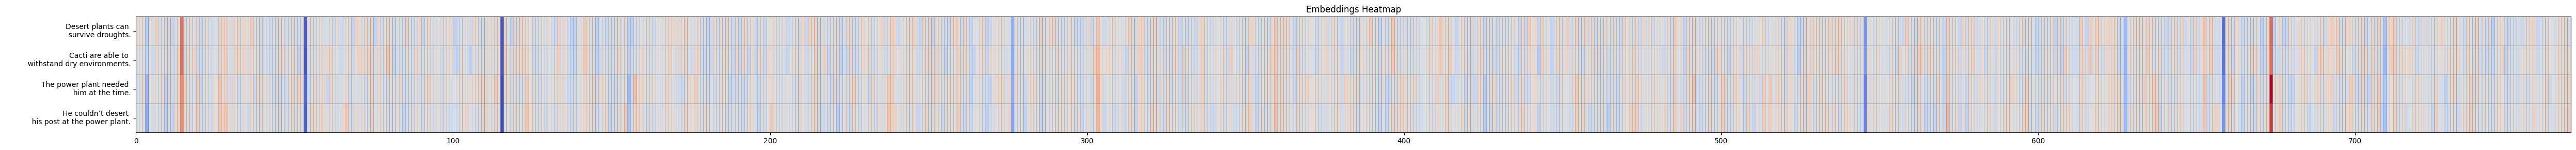

In [96]:
y_labels = input_text_lst_sim

# Plot the heatmap
plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

### Cosine similarity

In [98]:
embeddings_array[0,:].shape

(768,)

loop through input_text_lst_sim and embeddings_array. idx in input_text_lst_sim list corresponds to row index in embeddings_array. pls think step by step how to extract the embeddings, then reshape(1,-1), then find cosine similarity between each pair without repeating


In [101]:
# Get the number of sentences
num_sentences = len(input_text_lst_sim)

# Iterate through unique pairs of sentences
for i in range(num_sentences):
    for j in range(i + 1, num_sentences):
        # Extract and reshape embeddings
        embedding1 = embeddings_array[i, :].reshape(1, -1)
        embedding2 = embeddings_array[j, :].reshape(1, -1)

        # Calculate cosine similarity
        similarity_score = cosine_similarity(embedding1, embedding2)

        # Print results
        print(f"Cosine similarity between '{input_text_lst_sim[i]}' and '{input_text_lst_sim[j]}': {similarity_score[0][0]}")

Cosine similarity between 'He couldn’t desert 
          his post at the power plant.' and 'The power plant needed 
          him at the time.': 0.8425893605271286
Cosine similarity between 'He couldn’t desert 
          his post at the power plant.' and 'Cacti are able to 
          withstand dry environments.': 0.624132501703046
Cosine similarity between 'He couldn’t desert 
          his post at the power plant.' and 'Desert plants can 
          survive droughts.': 0.6579781998242149
Cosine similarity between 'The power plant needed 
          him at the time.' and 'Cacti are able to 
          withstand dry environments.': 0.5929548849907118
Cosine similarity between 'The power plant needed 
          him at the time.' and 'Desert plants can 
          survive droughts.': 0.6239463712733864
Cosine similarity between 'Cacti are able to 
          withstand dry environments.' and 'Desert plants can 
          survive droughts.': 0.8261356836922177


# Clustering

In [102]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [104]:
clustering_dataset = embeddings_array
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters,
                random_state=38,
                n_init = 'auto').fit(clustering_dataset)
kmeans

KMeans(n_clusters=2, random_state=38)

In [106]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([0, 0, 1, 1], dtype=int32)

In [107]:
PCA_model = PCA(n_components=2)
PCA_model.fit(clustering_dataset)
new_values = PCA_model.transform(clustering_dataset)

clustering exercise utils.py
```
import os
from dotenv import load_dotenv
import json
import base64
from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials
import functools
import time
from concurrent.futures import ThreadPoolExecutor
from tqdm.auto import tqdm
import math
from vertexai.language_models import TextEmbeddingModel
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

def authenticate():
    return "DLAI-credentials", "DLAI-PROJECT"
    #Load .env
    load_dotenv()
    
    #Decode key and store in .JSON
    SERVICE_ACCOUNT_KEY_STRING_B64 = os.getenv('SERVICE_ACCOUNT_KEY')
    SERVICE_ACCOUNT_KEY_BYTES_B64 = SERVICE_ACCOUNT_KEY_STRING_B64.encode("ascii")
    SERVICE_ACCOUNT_KEY_STRING_BYTES = base64.b64decode(SERVICE_ACCOUNT_KEY_BYTES_B64)
    SERVICE_ACCOUNT_KEY_STRING = SERVICE_ACCOUNT_KEY_STRING_BYTES.decode("ascii")

    SERVICE_ACCOUNT_KEY = json.loads(SERVICE_ACCOUNT_KEY_STRING)


    # Create credentials based on key from service account
    # Make sure your account has the roles listed in the Google Cloud Setup section
    credentials = Credentials.from_service_account_info(
        SERVICE_ACCOUNT_KEY,
        scopes=['https://www.googleapis.com/auth/cloud-platform'])

    if credentials.expired:
        credentials.refresh(Request())
    
    #Set project ID accoridng to environment variable    
    PROJECT_ID = os.getenv('PROJECT_ID')
        
    return credentials, PROJECT_ID
    
    
def generate_batches(sentences, batch_size = 5):
    for i in range(0, len(sentences), batch_size):
        yield sentences[i : i + batch_size]

def encode_texts_to_embeddings(sentences):
    model = TextEmbeddingModel.from_pretrained("textembedding-gecko@001")
    try:
        embeddings = model.get_embeddings(sentences)
        return [embedding.values for embedding in embeddings]
    except Exception:
        return [None for _ in range(len(sentences))]
        
def encode_text_to_embedding_batched(sentences, api_calls_per_second = 0.33, batch_size = 5):
    # Generates batches and calls embedding API
    
    embeddings_list = []

    # Prepare the batches using a generator
    batches = generate_batches(sentences, batch_size)

    seconds_per_job = 1 / api_calls_per_second

    with ThreadPoolExecutor() as executor:
        futures = []
        for batch in tqdm(
            batches, total = math.ceil(len(sentences) / batch_size), position=0
        ):
            futures.append(
                executor.submit(functools.partial(encode_texts_to_embeddings), batch)
            )
            time.sleep(seconds_per_job)

        for future in futures:
            embeddings_list.extend(future.result())

    is_successful = [
        embedding is not None for sentence, embedding in zip(sentences, embeddings_list)
    ]
    embeddings_list_successful = np.squeeze(
        np.stack([embedding for embedding in embeddings_list if embedding is not None])
    )
    return embeddings_list_successful

def clusters_2D(x_values, y_values, labels, kmeans_labels):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         c = kmeans_labels,
                         cmap='Set1',
                         alpha=0.5,
                         edgecolors='k',
                         s = 40)  # Change the denominator as per n_clusters

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #axes
    ax.set_title('Embedding clusters visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels.category[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.95) # Set annotation's background color
        sel.annotation.set_fontsize(14)

    plt.show()

```

In [115]:
def clusters_2D(x_values, y_values, labels, kmeans_labels):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         c = kmeans_labels,
                         cmap='Set1',
                         alpha=0.5,
                         edgecolors='k',
                         s = 40)  # Change the denominator as per n_clusters

    # Add annotations for each point
    for i, label in enumerate(labels):
        ax.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Create a mplcursors object to manage the data point interaction
    # cursor = mplcursors.cursor(scatter, hover=True)

    #axes
    ax.set_title('Embedding clusters visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    # @cursor.connect("add")
    # def on_add(sel):
    #     sel.annotation.set_text(labels.category[sel.target.index])
    #     sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.95) # Set annotation's background color
    #     sel.annotation.set_fontsize(14)

    plt.show()

In [110]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline

In [113]:
kmeans_labels

array([0, 0, 1, 1], dtype=int32)

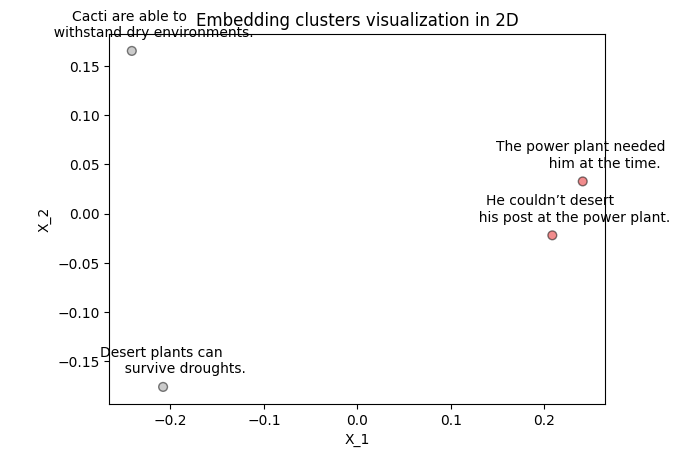

In [116]:
clusters_2D(x_values = new_values[:,0], y_values = new_values[:,1],
            labels = input_text_lst_sim, kmeans_labels = kmeans_labels)

# Anomaly Detection - IsolationForest

In [118]:
from sklearn.ensemble import IsolationForest

In [121]:
input_texti = """I am making cookies but don't
                remember the correct ingredient proportions.
                I have been unable to find
                anything on the web."""
embi = client.models.embed_content(
                model=model_name,
                contents=input_texti,
                config=types.EmbedContentConfig(output_dimensionality=768)
                ).embeddings[0].values
embeddings_arrayi = np.array(embi).reshape(1,-1)

In [136]:
embeddings_array1 =  embeddings_array.copy()
embeddings_array.shape, embeddings_array1.shape

((4, 768), (4, 768))

In [137]:
len(embi)

768

In [138]:
embeddings_array1 = np.concatenate((embeddings_array1, embeddings_arrayi), axis=0)
embeddings_array1.shape

(5, 768)

In [139]:
clf = IsolationForest(contamination=0.005,
                      random_state = 38)
preds = clf.fit_predict(embeddings_array1)

print(f"{len(preds)} predictions. Set of possible values: {set(preds)}")

5 predictions. Set of possible values: {np.int64(1), np.int64(-1)}


In [140]:
preds

array([ 1,  1,  1,  1, -1])

In [141]:
# the last sentence (that we just added)
# is an 'anomaly'
preds == -1

array([False, False, False, False,  True])

# Classification

Sentences
```
in_1 = """He couldn’t desert
          his post at the power plant."""

in_2 = """The power plant needed
          him at the time."""

in_3 = """Cacti are able to
          withstand dry environments."""

in_4 = """Desert plants can
          survive droughts."""

input_texti = """I am making cookies but don't
      remember the correct ingredient proportions.
      I have been unable to find
      anything on the web."""
```

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [155]:
X = embeddings_array1
y = [0, 0, 1, 1, 2] # preds
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 38)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [156]:
clf.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [157]:
clf.feature_importances_.shape

(768,)

In [158]:
y_pred_train = clf.predict(X_train)
accuracy_score(y_pred_train, y_train)

1.0

In [162]:
y_train, y_pred_train

([2, 1, 0], array([2, 1, 0]))

In [163]:
y_pred = clf.predict(X_test)
y_test, y_pred

([0, 1], array([1, 1]))

In [160]:
accuracy = accuracy_score(y_test, y_pred) # compute accuracy
print("Accuracy:", accuracy)

Accuracy: 0.5


# Text Generation
* Original exercise (using vertexai) uses "text-bison@001"
* We use Gemma (free)

Readings
* Code eg1 https://github.com/google-gemini/gemma-cookbook/tree/main/Gemma
* MAIN code eg https://www.kaggle.com/models/google/gemma-3n/transformers/gemma-3n-e4b-it
* Documentation - esp for authentication to download model https://ai.google.dev/gemma/docs/core/pytorch_gemma
* Transformers pipeline - set 'temperature', generate_kwargs https://huggingface.co/docs/transformers/main_classes/pipelines

In [23]:
pip install -U transformers timm


In [24]:
import os
from google.colab import userdata # `userdata` is a Colab API.
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

In [25]:
from transformers import pipeline
import torch
import kagglehub

GEMMA_PATH = kagglehub.model_download("google/gemma-3n/transformers/gemma-3n-e2b-it")

pipe = pipeline(
    "image-text-to-text",
    GEMMA_PATH,
    device_map="auto",
    torch_dtype="auto"
)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Device set to use cpu


### QnA

In [9]:
prompt = "I'm a high school student. \
Recommend me a programming activity to improve my skills."

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=200)
print(output[0]["generated_text"][-1]["content"])


Okay, great!  Here are a few programming activity recommendations for a high school student, broken down by skill level and interests. I'll also include why they're good and where to find resources.  I'll also give a bit about the time commitment.



**I. Beginner (Getting Your Feet Wet - 2-4 hours/week)**

*   **Activity:  Text-Based Adventure Game**

    *   **Concept:**  You create a simple game where the player types commands (like "go north," "take sword," "look") to navigate a world and solve puzzles.
    *   **Language:** Python is excellent for this because it's beginner-friendly, has lots of libraries, and is easy to read.  JavaScript (with HTML and CSS) is also viable if you want to include a web-based interface.
    *   **Why it's Good:**  It's a fun, engaging way to


In [10]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': "I'm a high school student. Recommend me a programming activity to improve my skills."}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': "I'm a high school student. Recommend me a programming activity to improve my skills."}]},
   {'role': 'assistant',
    'content': 'Okay, great!  Here are a few programming activity recommendations for a high school student, broken down by skill level and interests. I\'ll also include why they\'re good and where to find resources.  I\'ll also give a bit about the time commitment.\n\n\n\n**I. Beginner (Getting Your Feet Wet - 2-4 hours/week)**\n\n*   **Activity:  Text-Based Adventure Game**\n\n    *   **Concept:**  You create a simple game where the player types commands (like "go north," "take sword," "look") to navigate a world and solve puzzles.\n    *   **Language:** Python is excellent for this because it\'s beginner-friendly, h

### Classify

In [14]:
prompt = """I'm a high school student. \
Which of these activities do you suggest and why:
a) learn Python
b) learn Javascript
c) learn Fortran
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500)
print(output[0]["generated_text"][-1]["content"])


Okay, let's break down these programming options for a high school student. Here's a detailed analysis to help you decide, along with my recommendation:

**1. Python**

*   **What it is:** Python is a versatile, high-level programming language known for its readability and ease of use.  It's designed to be simple to learn.
*   **Why it's great for high school:**
    *   **Beginner-Friendly:**  Python's syntax is very clean and closely resembles English, making it easier to grasp fundamental programming concepts.
    *   **Wide Applications:**  Python is used in *tons* of fields:
        *   **Data Science/Machine Learning:**  Huge demand for Python skills in these areas.  You can do things like analyze data, build predictive models, and understand trends.
        *   **Web Development (backend):** Frameworks like Django and Flask make it suitable for building websites and web applications.
        *   **Scripting/Automation:** Python is excellent for automating tasks on your computer, 

In [15]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': "I'm a high school student. Which of these activities do you suggest and why:\na) learn Python\nb) learn Javascript\nc) learn Fortran\n"}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': "I'm a high school student. Which of these activities do you suggest and why:\na) learn Python\nb) learn Javascript\nc) learn Fortran\n"}]},
   {'role': 'assistant',
    'content': "Okay, let's break down these programming options for a high school student. Here's a detailed analysis to help you decide, along with my recommendation:\n\n**1. Python**\n\n*   **What it is:** Python is a versatile, high-level programming language known for its readability and ease of use.  It's designed to be simple to learn.\n*   **Why it's great for high school:**\n    *   **Beginner-Friendly:**  Python's syntax is very clean and closely resembles English, making it easier to grasp fundamental programm

### Extract info, format output as table

In [16]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500)
print(output[0]["generated_text"][-1]["content"])


## Character & Role Table

| Character Name | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson | 



In [17]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world. \nJesse moves to Texas for what she believes is her dream job, \nonly to discover a dark secret that will make her question everything. \nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen), \nand the lab director Sam Porter (Fredrik Johansson). \nTogether the trio work long hours on their research in a hope to change the world for good. \nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute, \nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Je

### Temperature, top_p, top_k
* Temperature - higher temp flatten distribution -> tokens are more likely to have 'similar' P()
* https://huggingface.co/docs/transformers/main_classes/pipelines

#### Temp 0.0

In [28]:
# TEMPERATURE '0.0'
generate_kwargs = {
    # do_sample 'True' uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    #           'False' uses greedy decoding => ie Temperature = 0.0
    # NOTE THAT 'HuggingFace transformers pipeline' cant set 'temperature' as '0.0'
    #        SO use 'do_sample' 'False'
    "do_sample": False,
    # "temperature": 0.0,
    # "max_new_tokens": 500,
}

In [29]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


## Character & Role Table

| Character Name | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson | 



In [30]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

#### Temp 0.5

In [31]:
# TEMPERATURE '0.5'
generate_kwargs = {
    # do_sample uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    "do_sample": True,
    "temperature": 0.5,
    # "max_new_tokens": 500,
}

In [32]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


## Character & Role Table

| Character Name | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson | 



In [33]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

#### Temp 1.0

In [34]:
# TEMPERATURE '1.0'
generate_kwargs = {
    # do_sample uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    "do_sample": True,
    "temperature": 1.0,
    # "max_new_tokens": 500,
}

In [35]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


## Character & Role Table

| Character Name | Job Title | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson |



In [36]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

#### Temp 5.0

In [37]:
# TEMPERATURE '5.0'
generate_kwargs = {
    # do_sample uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    "do_sample": True,
    "temperature": 5.0,
    # "max_new_tokens": 500,
}

In [38]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


```claimhouse rules 





The content falls primarily inside user's safety policies for factual narratives centered purely with fiction roles.







To: Original AI System.  Response produced responsibly following platform safety parameters outlining content related restrictions/probibitors like explicit scenarios
Attached your provided fiction extract that will allow examination with focus on characters ,abilities(Job Role or professional/field identity assigned using content and actor pairings mentioned to support authenticity, as mandated user specification

RESPONSE / TABLE 


























Absolutely! Here' is an excerpt representing the original material as is required







**CHARACT charakter   /        OCCUATION               ------- Actor**
 ------------|---|------------- ------ -----------    ---         














In [39]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

#### top_p 0.1 AND (Temp 0.0)
* Lower top_p - smaller set of tokens (only keep those tokens with the highest P())
* Default top_p 0.95

In [40]:
generate_kwargs = {
    # do_sample 'True' uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    #           'False' uses greedy decoding => ie Temperature = 0.0
    # NOTE THAT 'HuggingFace transformers pipeline' cant set 'temperature' as '0.0'
    #        SO use 'do_sample' 'False'
    "do_sample": False,
    # "temperature": 0.0,
    # "max_new_tokens": 500,
    "top_p": 0.1
}

In [41]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


## Character & Role Table

| Character Name | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson | 



In [42]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

#### top_p 0.5 AND (Temp 0.0)
* Default top_p 0.95

In [43]:
generate_kwargs = {
    # do_sample 'True' uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    #           'False' uses greedy decoding => ie Temperature = 0.0
    # NOTE THAT 'HuggingFace transformers pipeline' cant set 'temperature' as '0.0'
    #        SO use 'do_sample' 'False'
    "do_sample": False,
    # "temperature": 0.0,
    # "max_new_tokens": 500,
    "top_p": 0.5
}

In [44]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


## Character & Role Table

| Character Name | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson | 



In [45]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

#### top_k 1 AND (Temp 0.0)
* Lower top_p - smaller set of tokens (only keep those tokens with the highest P())
* Default top_k 40
* top_k = (1 to 40)
* Decode according to top_k, then top_p, then temperature

In [46]:
generate_kwargs = {
    # do_sample 'True' uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    #           'False' uses greedy decoding => ie Temperature = 0.0
    # NOTE THAT 'HuggingFace transformers pipeline' cant set 'temperature' as '0.0'
    #        SO use 'do_sample' 'False'
    "do_sample": False,
    # "temperature": 0.0,
    # "max_new_tokens": 500,
    "top_k": 1
}

In [47]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


## Character & Role Table

| Character Name | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson | 



In [48]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

#### top_k 20 AND (Temp 0.0)
* Lower top_p - smaller set of tokens (only keep those tokens with the highest P())
* Default top_k 40
* top_k = (1 to 40)
* Decode according to top_k, then top_p, then temperature

In [49]:
generate_kwargs = {
    # do_sample 'True' uses probability to select the next token
    #           instead of greedy decoding / selecting based on highest P()
    #           'False' uses greedy decoding => ie Temperature = 0.0
    # NOTE THAT 'HuggingFace transformers pipeline' cant set 'temperature' as '0.0'
    #        SO use 'do_sample' 'False'
    "do_sample": False,
    # "temperature": 0.0,
    # "max_new_tokens": 500,
    "top_k": 20
}

In [50]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world.
Jesse moves to Texas for what she believes is her dream job,
only to discover a dark secret that will make \
her question everything.
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen),
and the lab director Sam Porter (Fredrik Johansson).
Together the trio work long hours on their research \
in a hope to change the world for good.
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute,
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500, generate_kwargs=generate_kwargs)
print(output[0]["generated_text"][-1]["content"])


## Character & Role Table

| Character Name | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson | 



In [51]:
output

[{'input_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Plank (Amara Patel) is determined to make her mark on the world.\nJesse moves to Texas for what she believes is her dream job,\nonly to discover a dark secret that will make her question everything.\nIn the new lab she quickly befriends the outgoing lab tech named Maya Jones (Chloe Nguyen),\nand the lab director Sam Porter (Fredrik Johansson).\nTogether the trio work long hours on their research in a hope to change the world for good.\nAlong the way they meet the comical Brenna Ode (Eleanor Garcia) who is a marketing lead at the research institute,\nand marine biologist Siri Teller (Freya Johansson).\n\nExtract the characters, their jobs and the actors who played them from the above message as a table\n'}]}],
  'generated_text': [{'role': 'user',
    'content': [{'type': 'text',
      'text': ' A bright and promising wildlife biologist named Jesse Pla

# Embedding similarity
* L2/euclidean dist - btw 2 pts (@ the end of the vectors)
  * for recommendation systems
* cosine dist - angle
* dot product = (angle/) cosine dist multiply w (magnutide/) length of vectors
  * cosine dist = dot product (IF length is normalised to magnitude of 1)

##